<a href="https://colab.research.google.com/github/Towfiqpranto/Potato-Disease-Classifcation/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import experimental

In [ ]:
dataset=tf.data.Dataset.list_files('/content/drive/MyDrive/PlantVillage/*/*')
for files in dataset.take(10):
  print(files)

tf.Tensor(b'/content/drive/MyDrive/PlantVillage/Potato___Early_blight/4138df1f-b8f7-429f-9e95-a627f6aba912___RS_Early.B 7667.JPG', shape=(), dtype=string)
tf.Tensor(b'/content/drive/MyDrive/PlantVillage/Potato___Late_blight/23ad201a-469e-4687-9321-7329bf747992___RS_LB 4990.JPG', shape=(), dtype=string)
tf.Tensor(b'/content/drive/MyDrive/PlantVillage/Potato___Early_blight/da412bf6-6bee-4dfb-8bc7-b6e9f80971ff___RS_Early.B 6808.JPG', shape=(), dtype=string)
tf.Tensor(b'/content/drive/MyDrive/PlantVillage/Potato___Early_blight/fba7a41d-25df-4a1c-93d1-98d62e3376e0___RS_Early.B 8207.JPG', shape=(), dtype=string)
tf.Tensor(b'/content/drive/MyDrive/PlantVillage/Potato___Early_blight/fdc691b0-2b15-4cb6-8f5d-c4e5654389e0___RS_Early.B 7935.JPG', shape=(), dtype=string)
tf.Tensor(b'/content/drive/MyDrive/PlantVillage/Potato___Early_blight/c777a0ce-5d2b-4e87-8cc4-d5f8847a4553___RS_Early.B 8239.JPG', shape=(), dtype=string)
tf.Tensor(b'/content/drive/MyDrive/PlantVillage/Potato___Early_blight/e786a4

In [ ]:
dataset= tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/PlantVillage',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
)

Found 2152 files belonging to 3 classes.


In [ ]:
dataset

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
classes=dataset.class_names
classes

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
img=[]
cls=[]
for image,label in dataset:
  for i in range(len(image)):
    img.append(image[i].numpy())
    cls.append(label.numpy()[i])

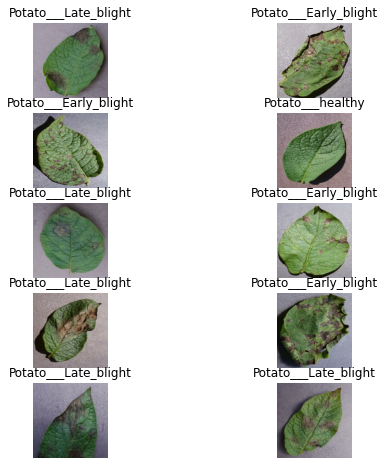

In [ ]:
plt.figure(figsize=(8,8))
for image,label in dataset.take(1):
  for i in range(10):
    plt.subplot(5,2,i+1)
    plt.imshow(image[i].numpy().astype('uint32'))
    plt.title(classes[label.numpy()[i]])
    plt.axis('off')

In [ ]:
 def train_test_split(ds,train=0.8, validation=0.1, test=0.1):
   size=len(ds)
   train_size=int(size*train)
   val_size=int(size*validation)
   train_ds=ds.take(train_size)
   val_ds=ds.skip(train_size).take(val_size)
   test_ds=ds.skip(train_size).skip(val_size)
   return train_ds,val_ds,test_ds

In [ ]:
train_ds,val_ds,test_ds=train_test_split(dataset)

In [ ]:
train_ds=train_ds.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)

In [ ]:
preprocess=tf.keras.Sequential([
                     layers.experimental.preprocessing.Resizing(256,256),
                     layers.experimental.preprocessing.Rescaling(1.0/255),
                     layers.experimental.preprocessing.RandomZoom(0.1),
                     layers.experimental.preprocessing.RandomRotation(0.1),
                     layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical')
])

In [ ]:
model = Sequential([
  preprocess,
  layers.Conv2D(padding='same',activation='relu',filters=32,kernel_size=(3,3),input_shape=(32,256,256,3)),
  layers.MaxPooling2D(),
  layers.Conv2D(64,(3,3),padding='same',activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64,(3,3),padding='same',activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64,(3,3),padding='same',activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64,(3,3),padding='same',activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64,(3,3),padding='same',activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(64,activation='relu'),
  layers.Dense(len(classes),activation='softmax')
])
model.build((32,256,256,3))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d_12 (Conv2D)          (32, 256, 256, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (32, 128, 128, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (32, 128, 128, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (32, 64, 64, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (32, 64, 64, 64)         

In [ ]:
history=model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
              
model.fit(
    train_ds,
    verbose=1,
    epochs=50,
    batch_size=32,
    validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 237s 4s/step - loss: 0.1477 - accuracy: 0.9369 - val_loss: 0.0705 - val_accuracy: 0.9740
Epoch 2/50
54/54 [==============================] - 231s 4s/step - loss: 0.0907 - accuracy: 0.9624 - val_loss: 0.1557 - val_accuracy: 0.9531
Epoch 3/50
54/54 [==============================] - 226s 4s/step - loss: 0.1029 - accuracy: 0.9641 - val_loss: 0.0732 - val_accuracy: 0.9792
Epoch 4/50
54/54 [==============================] - 226s 4s/step - loss: 0.0736 - accuracy: 0.9757 - val_loss: 0.0530 - val_accuracy: 0.9844
Epoch 5/50
54/54 [==============================] - 227s 4s/step - loss: 0.0784 - accuracy: 0.9682 - val_loss: 0.0459 - val_accuracy: 0.9740
Epoch 6/50
54/54 [==============================] - 227s 4s/step - loss: 0.0908 - accuracy: 0.9688 - val_loss: 0.0845 - val_accuracy: 0.9635
Epoch 7/50
54/54 [==============================] - 227s 4s/step - loss: 0.1349 - accuracy: 0.9525 - val_loss: 0.1493 - val_accuracy: 0.9479
Epoch 8/50
54

In [ ]:
model.evaluate(test_ds)

8/8 [==============================] - 21s 2s/step - loss: 0.0410 - accuracy: 0.9914


[0.041005007922649384, 0.9913793206214905]

In [ ]:
a=model.predict(test_ds)

In [ ]:
a.shape

(232, 3)

In [ ]:
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()
# # summarize history for loss
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

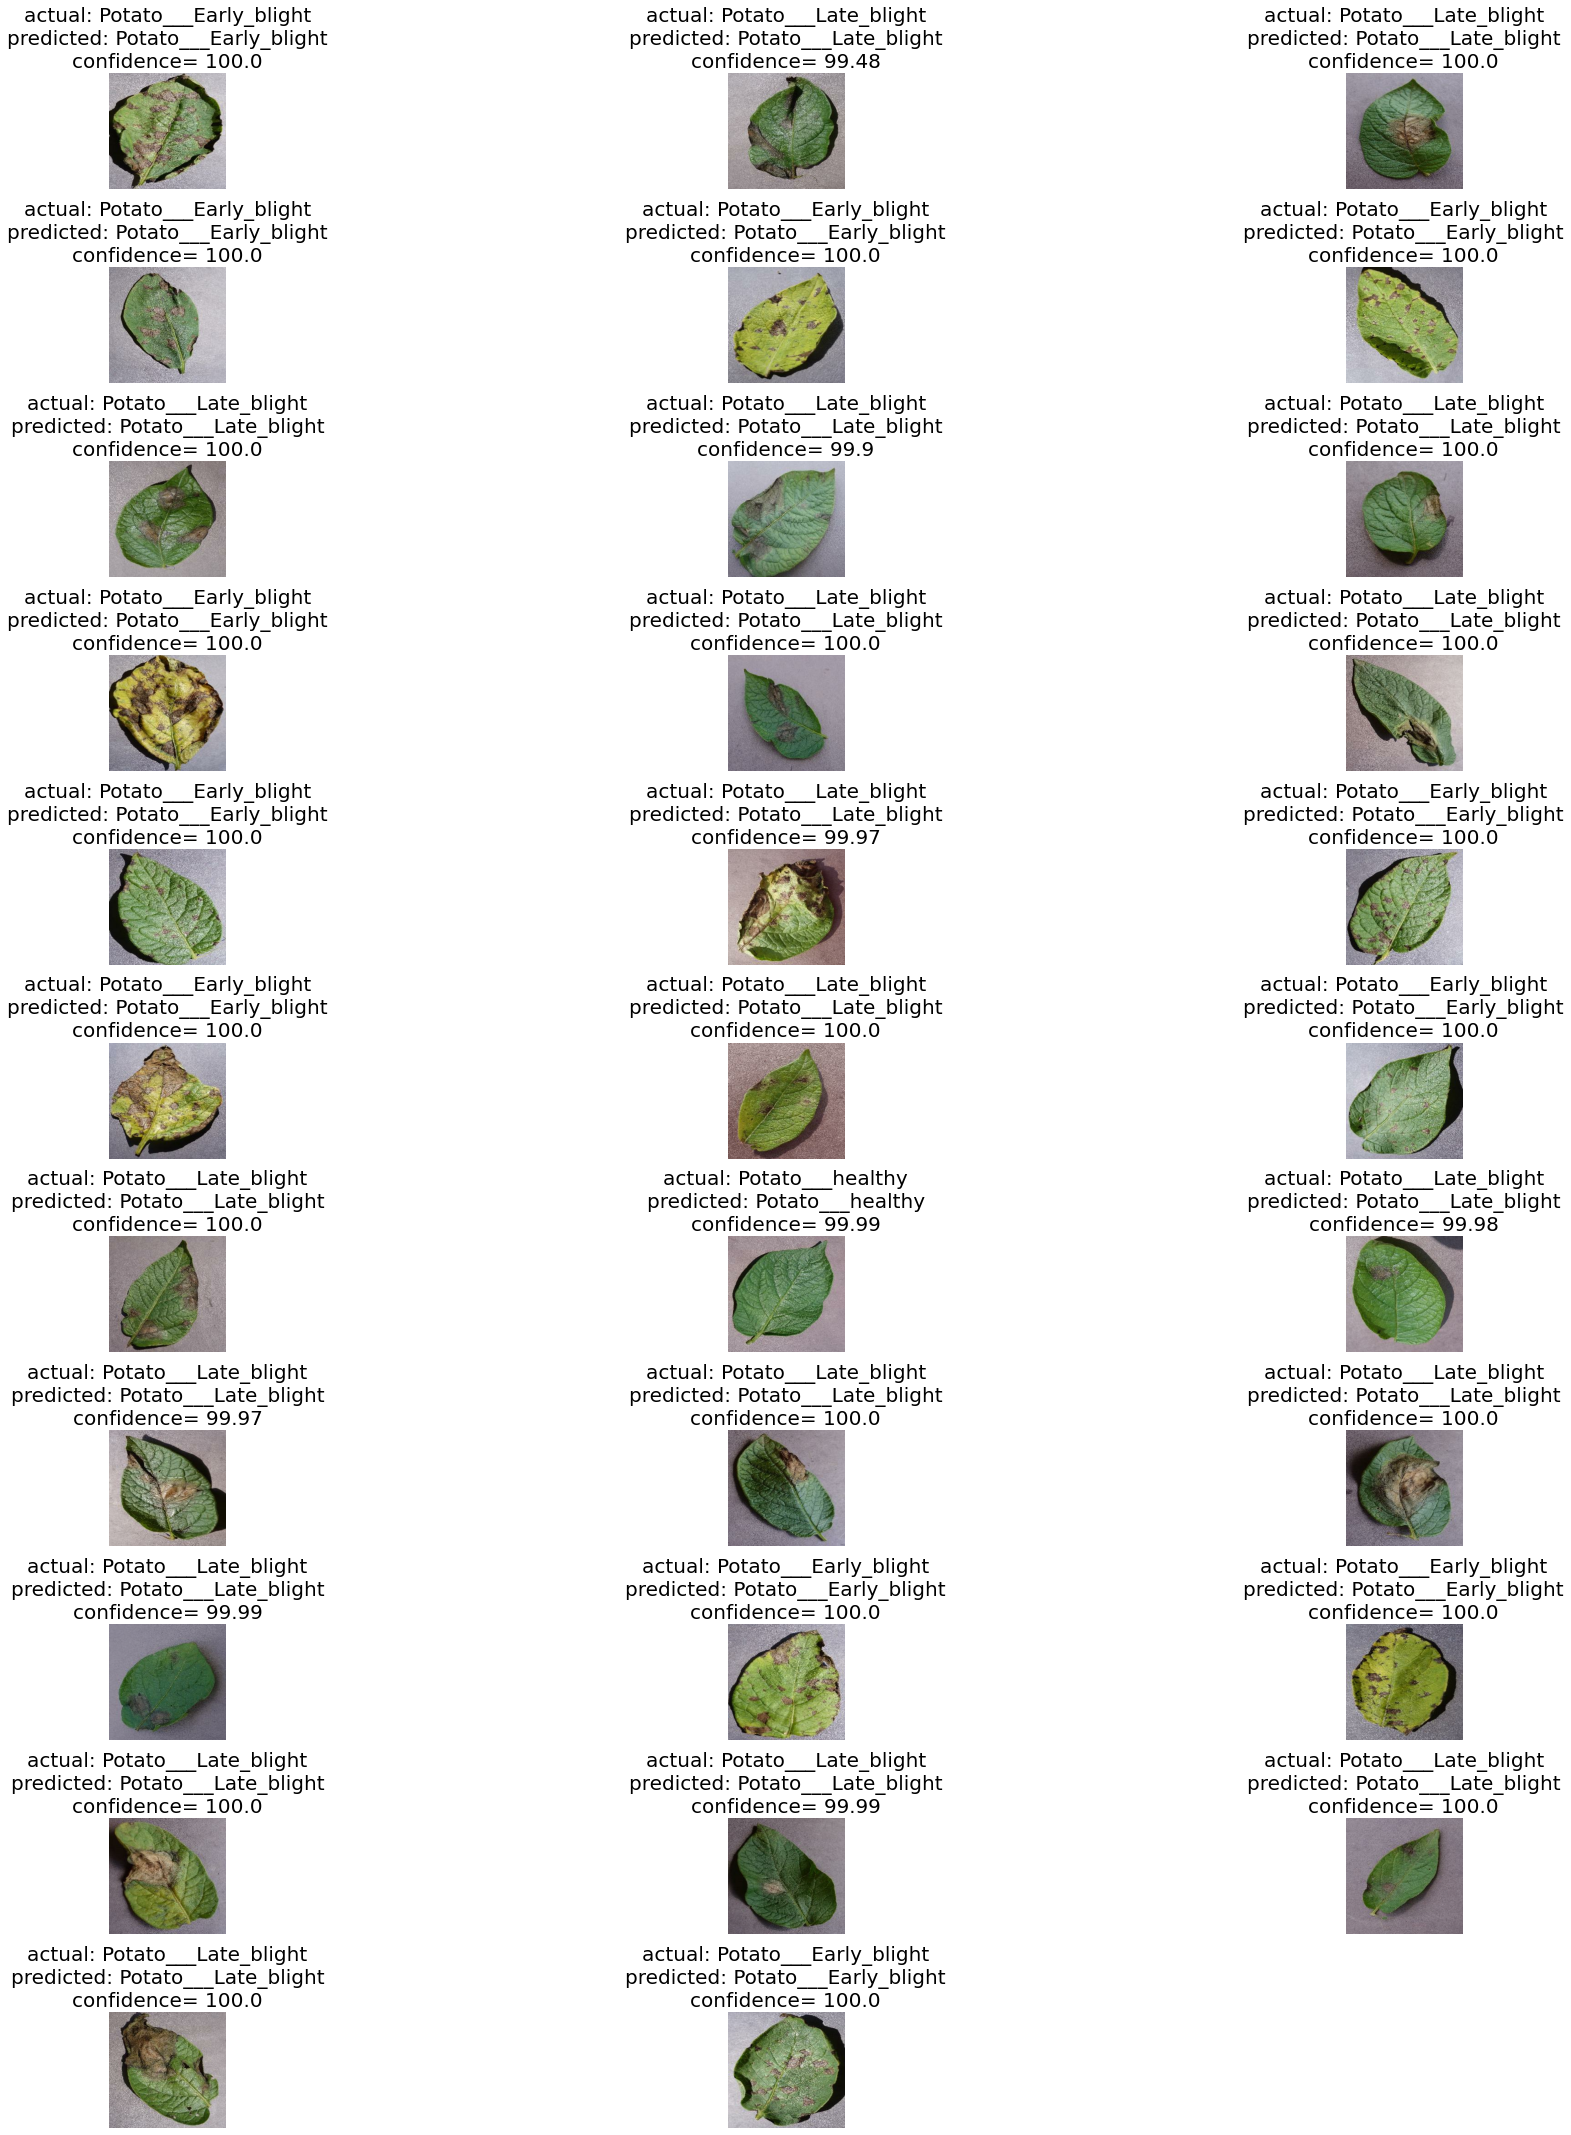

In [ ]:
plt.figure(figsize=(30,30))
# plt.subplot(11,3,i+1,constrained_layout = True)
for image,label in test_ds.take(1):
  predicted=new_model.predict(image)
  for i in range(len(image)):
    plt.subplot(11,3,i+1)
    plt.imshow(image[i].numpy().astype('uint32'))
    plt.tight_layout()
   # plt.subplots_adjust( 
    #                wspace=0.4, 
     #               hspace=1.5)
    actual_label=classes[label.numpy()[i]]
    predicted_label=classes[np.argmax(predicted[i])]
    confidence=round(100*np.max(predicted[i]),2)
    plt.title(f"actual: {actual_label}\npredicted: {predicted_label}\nconfidence= {confidence}",fontsize=20)
    plt.axis('off')

In [ ]:
predicted.shape

(32, 3)

In [ ]:
model.save('my_model.h5')

In [ ]:
new_model = tf.keras.models.load_model('/content/my_model.h5')

# Check its architecture
new_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_10 (Sequential)  (None, 256, 256, 3)       0         
                                                                 
 conv2d_54 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_54 (MaxPoolin  (None, 128, 128, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_55 (Conv2D)          (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_55 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_56 (Conv2D)          (None, 64, 64, 64)      

In [ ]:
new_model.evaluate(test_ds)

8/8 [==============================] - 9s 965ms/step - loss: 0.0246 - accuracy: 0.9914


[0.024623049423098564, 0.9913793206214905]

In [ ]:
img=[image for image,label in dataset.take(1).as_numpy_iterator()]
img=np.array(img)

In [ ]:
img.shape

(1, 32, 256, 256, 3)

(256, 256, 3)

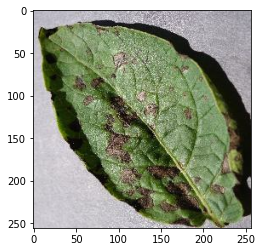

In [ ]:
img_array=tf.keras.preprocessing.image.img_to_array(img[0][5])
plt.imshow(img_array.astype('uint32'))
img_array.shape

In [ ]:
img_array=tf.expand_dims(img_array,0)
img_array.shape

TensorShape([1, 256, 256, 3])

In [ ]:
aa=new_model.predict(img_array)
np.max(aa)

1.0